This is a notebook meant to display the results of the MCMC run that Tom ran over the weekend of November 17-19.

Tom varied X_in, X_out, T_jump, with each smoothly varying.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
print(emcee.__version__)
reader = emcee.backends.HDFBackend("../model_chain_weekend.h5")

3.0.0.dev0


In [45]:
tau = reader.get_autocorr_time(quiet=True)
burnin = int(2*np.max(tau))
thin = 1
all_samples = reader.get_chain(discard=0, thin=thin)

samples = reader.get_chain(discard=burnin, thin=thin)
log_prob_samples = reader.get_log_prob(discard=burnin, flat=True, thin=thin)
log_prior_samples = reader.get_blobs(discard=burnin, flat=True, thin=thin)
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))
# print("flat log prior shape: {0}".format(log_prior_samples.shape))

N/50 = 8;
tau: [ 26.73789195  27.12716772  24.90471172]


burn-in: 54
thin: 1
chain shape: (346, 12, 3)
flat log prob shape: (4152,)


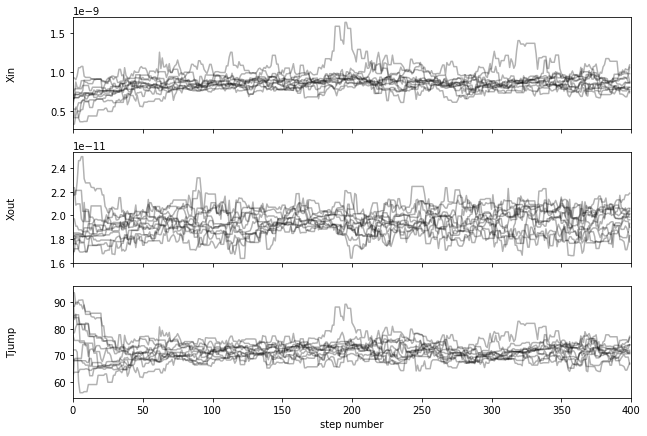

In [46]:
fig, axes = plt.subplots(all_samples.ndim, figsize=(10, 7), sharex=True)
labels = ["Xin", "Xout", "Tjump"]
for i in range(all_samples.ndim):
    ax = axes[i]
    ax.plot(all_samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(all_samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number");
plt.show()

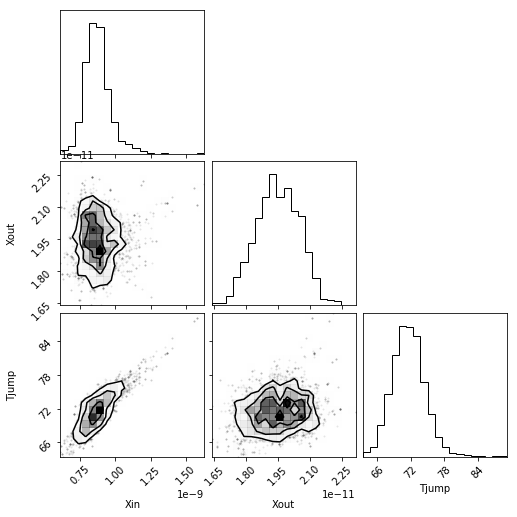

In [38]:
flat_samples = reader.get_chain(discard=burnin, flat=True)
fig = corner.corner(flat_samples, labels=labels)
plt.show()

In [43]:
from IPython.display import display, Math

for i in range(samples.ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.2e}_{{-{1:.2e}}}^{{{2:.2e}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

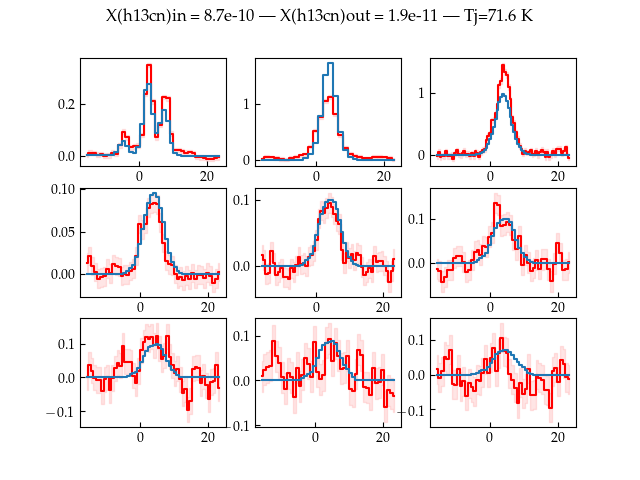

In [31]:
from IPython.display import Image
Image(filename='bestfit.png')